IGNORE WARNINGS

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder # for encoding non-numerical datapoints

#NaiveBayes
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix, classification_report, recall_score, accuracy_score, precision_score

#One hot Encoding
from sklearn.preprocessing import OneHotEncoder


# ASSIGNMENT PART 1

IMPORTING & READING THE DATASET

In [3]:
cust_df = pd.read_csv("/content/BA - Assignment Part 1 data set.xlsx - E Comm.csv")

In [4]:
cust_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [5]:
#To find the number of rows and columns
rows, columns = cust_df.shape
print(f'The datset contains {rows} rows and {columns} columns.')

The datset contains 5630 rows and 20 columns.


In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
cust_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


EXPLORATORY DATA ANALYSIS + DATA PREPROCESSING

In [8]:
#Renaming columns for better understanding
rename_col = {"CustomerID": "customer_id",\
              "Tenure": "customer_tenure(in months)",\
              "Churn":"churn",\
              "PreferredLoginDevice" : "fav_login_device",\
              "CityTier":"city_tier",\
              "WarehouseToHome":"warehouse_to_home(in km)",\
              "Gender":"gender",\
              "PreferredPaymentMode":"fav_payment_method",\
              "HourSpendOnApp":"daily_app_usage(hours)",\
              "NumberOfDeviceRegistered":"total_registered_devices",\
              "PreferedOrderCat":"fav_ordering_category(last month)",\
              "SatisfactionScore":"satisfaction_score",\
              "MaritalStatus":"martial_status",\
              "NumberOfAddress":"total_addresses",\
              "Complain":"complain(last month)",\
              "OrderAmountHikeFromlastYear":"increase_in_orders(percentage)",\
              "CouponUsed":"total_coupons_used(last month)",\
              "OrderCount":"order_placed(last month)",\
              "DaySinceLastOrder":"last_order(days passed)",\
              "CashbackAmount":"avg_cashback(last month)"
              }

cust_df = cust_df.rename(columns = rename_col)
cust_df.head(2)

,customer_id,churn,customer_tenure(in months),fav_login_device,city_tier,warehouse_to_home(in km),fav_payment_method,gender,daily_app_usage(hours),total_registered_devices,fav_ordering_category(last month),satisfaction_score,martial_status,total_addresses,complain(last month),increase_in_orders(percentage),total_coupons_used(last month),order_placed(last month),last_order(days passed),avg_cashback(last month)
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


NUMBER OF FEATURES

In [9]:
#Finding out the number of categrorical and numerical features
num_cols, cat_cols = [],[]
numerical, categorical = 0,0
for feature in cust_df.columns:
  if cust_df.dtypes[feature] != 'O':
    numerical += 1
    num_cols.append(feature)
  else:
    categorical += 1
    cat_cols.append(feature)

print(f'There are {numerical} numerical features and {categorical} categorical features')
print('\nNumerical Features:')
print(num_cols)
print("\nCategorical Features:")
print(cat_cols)

There are 15 numerical features and 5 categorical features

Numerical Features:
['customer_id', 'churn', 'customer_tenure(in months)', 'city_tier', 'warehouse_to_home(in km)', 'daily_app_usage(hours)', 'total_registered_devices', 'satisfaction_score', 'total_addresses', 'complain(last month)', 'increase_in_orders(percentage)', 'total_coupons_used(last month)', 'order_placed(last month)', 'last_order(days passed)', 'avg_cashback(last month)']

Categorical Features:
['fav_login_device', 'fav_payment_method', 'gender', 'fav_ordering_category(last month)', 'martial_status']


## ANALYSING THE TARGET FEATURE

CREATING A VISUALIZATION AROUND TARGET FEATURE

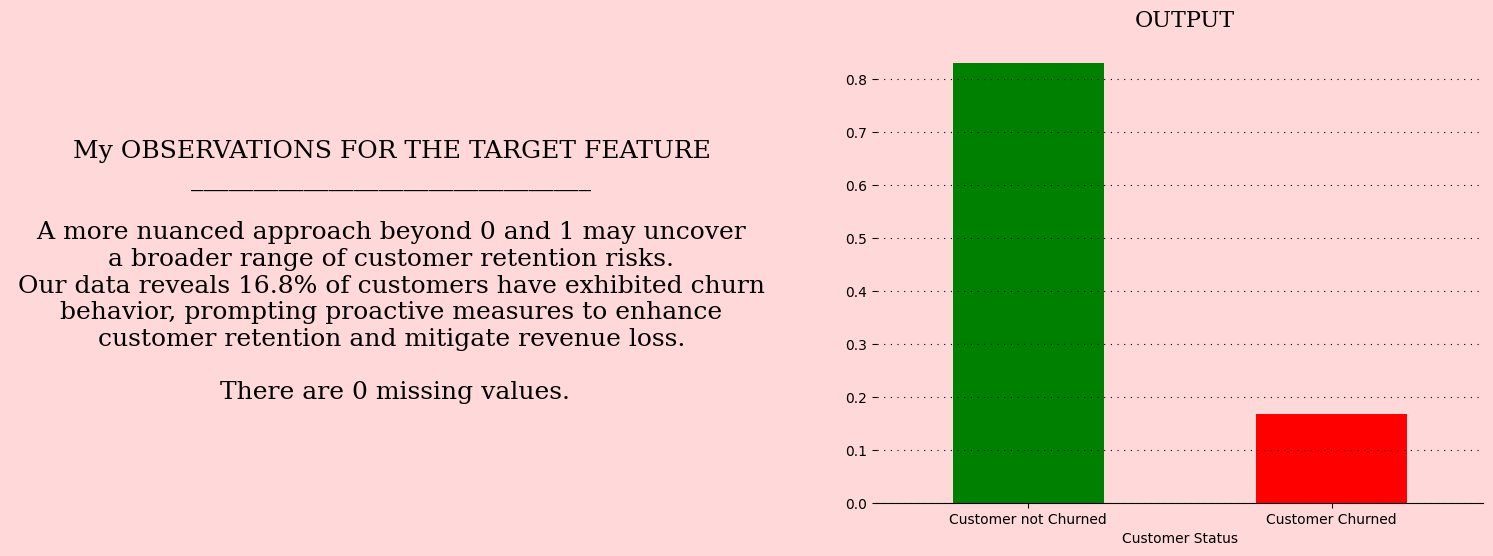

In [10]:
#A subplot space which is divided into two columns
fig = plt.figure(figsize=(18,6))

#a grid container which holds the subplots which are defined as 1 row and 2 columns
area = fig.add_gridspec(1,2)
area.update(wspace=0.3, hspace=0.15) #providing spacing adjustments
area_1 = fig.add_subplot(area[0,0])
area_2 =fig.add_subplot(area[0,1])

#Inserting a background colour
bg_color = '#ffd9d9'
for selection in [fig, area_1, area_2]:
    selection.set_facecolor(bg_color)

#Adding a derived metric - labelling the values to match their appropriate meaning
label_mapping ={0:"Customer not Churned",1:"Customer Churned"}
cust_df["churn_status"] = cust_df["churn"].replace(label_mapping)

#Plotting the target varibale - "churn"
cust_df["churn_status"].value_counts(normalize=True).plot.bar(color=["green","red"])
area_2.grid(color="#000000", linestyle=":", axis="y", zorder=0, dashes=(1,5))
area_2.text(0.35, 0.9,"OUTPUT", fontsize=16, fontfamily="serif")
plt.xticks(rotation=0)
plt.xlabel("Customer Status")

#Adding the analysis in area_1
not_churned, churned = cust_df["churn"].value_counts(normalize=True)*100
not_churned = np.round(not_churned, 1)
churned = np.round(churned, 1)

area_1.text(0.5, 0.5, f"My OBSERVATIONS FOR THE TARGET FEATURE\n________________________________\
\n\n A more nuanced approach beyond 0 and 1 may uncover \n a broader range of customer \
retention risks. \n Our data reveals {churned}% of customers have exhibited churn \
\n behavior, prompting proactive measures to enhance \n customer retention and mitigate revenue loss. \
\n\n There are 0 missing values."\
,ha="center", va="center",size=18, family="serif")

#Customizing the visualization
area_1.xaxis.set_visible(False)
area_1.yaxis.set_visible(False)
for position in ["left","right","top","bottom"]:
  for selection in [area_1, area_2]:
    if position == "bottom" and selection == area_2:
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)

In [11]:
not_churned, churned = cust_df["churn"].value_counts(normalize=True)*100
not_churned = np.round(not_churned, 1)
churned = np.round(churned, 1)

print(f"Data shows, company is succesfull in retaining {not_churned}% of customers.")
print(f"However on the other side, {churned}% have churned out.")

Data shows, company is succesfull in retaining 83.2% of customers.
However on the other side, 16.8% have churned out.


## Exploratory Data Analysis

In [12]:
def null_col_count(df, only_column_names=None, specific_columns = None):
  """
  Get a List of columns with null values ina DataFrame

  Args :
      df (pd.DataFrame): specify the specific df you want to work on
      only_col_names (bool, optional): If true returns column names only.
            If False, returns the standard output with null values. Default is True.
      specified_columns (list or None, optional): List of specific column names.
            If provided, returns data for these columns only. Default is None.

  Returns:
          List of column names and their corresponding missing values
  """
  null_cols = df.columns[df.isnull().any()].to_list()
  col_count = 0
  print("Columns: ")

  if specific_columns:
    for col in specific_columns:
      null_count = df[col].isnull().sum()
      print(f" Column '{col}' has '{null_count}' missing values")


  elif only_column_names:
    return null_cols
  else:
    for columns in df:
      null_count = df[columns].isnull().sum()
      if null_count > 0:
        print(f" Column '{columns}' has '{null_count}' missing values")
        col_count += 1
    print(f"\n\n There '{col_count}' columns which contain missing values")

null_col_count(cust_df)

Columns: 
 Column 'customer_tenure(in months)' has '264' missing values
 Column 'warehouse_to_home(in km)' has '251' missing values
 Column 'daily_app_usage(hours)' has '255' missing values
 Column 'increase_in_orders(percentage)' has '265' missing values
 Column 'total_coupons_used(last month)' has '256' missing values
 Column 'order_placed(last month)' has '258' missing values
 Column 'last_order(days passed)' has '307' missing values


 There '7' columns which contain missing values


Before we start visualizing different columns I want to find relevant variables with respect to our target variable which is "churn". For that I'm looking into the correlation.

In [13]:
def generate_corr_heatmap(df):
  """
  Get df (pd.DataFrame) as input t generate correlation heatmap
  """
  plt.figure(figsize=(12,8))
  sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap="Purples")
  plt.title("Correlation Heatmap")
  plt.show()

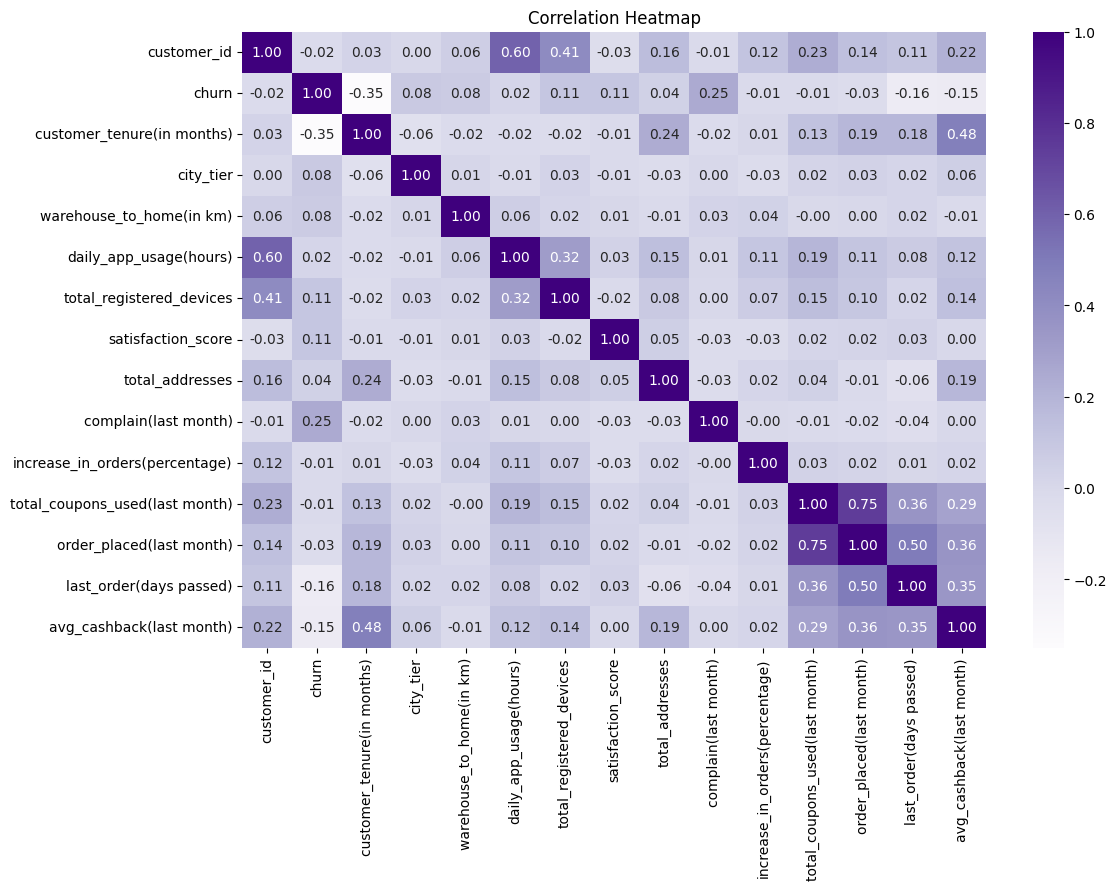

In [14]:
#Visualizing heatmap without any imutations
generate_corr_heatmap(cust_df)

In [15]:
cust_df.corr()["churn"].sort_values()

customer_tenure(in months)       -0.349408
last_order(days passed)          -0.160757
avg_cashback(last month)         -0.154161
order_placed(last month)         -0.028697
customer_id                      -0.019083
increase_in_orders(percentage)   -0.010058
total_coupons_used(last month)   -0.008264
daily_app_usage(hours)            0.018675
total_addresses                   0.043931
warehouse_to_home(in km)          0.076630
city_tier                         0.084703
satisfaction_score                0.105481
total_registered_devices          0.107939
complain(last month)              0.250188
churn                             1.000000
Name: churn, dtype: float64

I'll be removing customer_id, Total_coupons_used(last month), avg_cashback(last month)

Reason: They are negatively correlated and they are not that impactful on customer churn.

From now onwards we will only be using updated_cust_df instead of cust_df

In [16]:
updated_cust_df = cust_df.drop(["customer_id",\
                               "total_coupons_used(last month)",\
                               "avg_cashback(last month)"], axis = 1)

In [17]:
len(updated_cust_df.columns)

18

In [18]:
# Check run for multiple or wrong data points in catgorical variables
cat_col = ["fav_login_device", "city_tier", "fav_payment_method", "gender", "fav_ordering_category(last month)", "satisfaction_score", "martial_status"]
for column_name in cat_col:
  print(f"\n{column_name}:")
  print(updated_cust_df[column_name].value_counts())



fav_login_device:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: fav_login_device, dtype: int64

city_tier:
1    3666
3    1722
2     242
Name: city_tier, dtype: int64

fav_payment_method:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: fav_payment_method, dtype: int64

gender:
Male      3384
Female    2246
Name: gender, dtype: int64

fav_ordering_category(last month):
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: fav_ordering_category(last month), dtype: int64

satisfaction_score:
3    1698
1    1164
5    1108
4    1074
2     586
Name: satisfaction_score, dtype: int64

martial_status:
Married     2986
Single      1796
Divorced     848
Name: martial_status, dtype: int64


The above analysis shows that there are categories which are similar buit are named differently.

For instance:
1. fav_login_device : "Mobile Phoone and Phone are similar and needs to be merged."
2. fav_payment_method : "CC and Credit Cards and COD and Cash on Delivery are one and a same thing."

In [19]:
# fav_login_device - Phone to Mobile Phone
updated_cust_df['fav_login_device'] = updated_cust_df['fav_login_device'].\
replace('Phone', 'Mobile Phone')
print(updated_cust_df["fav_login_device"].value_counts())

Mobile Phone    3996
Computer        1634
Name: fav_login_device, dtype: int64


In [20]:
# fav_payment_method - Changing Cahs on Delivery to COD, and Changing CC to Credit Cards
updated_cust_df['fav_payment_method'] = updated_cust_df['fav_payment_method'].\
replace(["CC","Cash on Delivery"], ["Credit Card","COD"])
print(updated_cust_df["fav_payment_method"].value_counts())

Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: fav_payment_method, dtype: int64


In [21]:
# fav_ordering_category(last month) - Mobile to Mobile Phone
updated_cust_df['fav_ordering_category(last month)'] = updated_cust_df['fav_ordering_category(last month)'].\
replace('Mobile', 'Mobile Phone')
print(updated_cust_df["fav_ordering_category(last month)"].value_counts())

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: fav_ordering_category(last month), dtype: int64


We have corrected the Wrong Data Points. Now lets work on Missing values now. My main concern was to do this in order to perform right output of any calculations done

## FEATURES WITH MISSING VALUES

In [22]:
updated_cust_df["churn"].isnull().sum()

0

In [23]:
round((cust_df.isnull().mean())*100, 2)

customer_id                          0.00
churn                                0.00
customer_tenure(in months)           4.69
fav_login_device                     0.00
city_tier                            0.00
warehouse_to_home(in km)             4.46
fav_payment_method                   0.00
gender                               0.00
daily_app_usage(hours)               4.53
total_registered_devices             0.00
fav_ordering_category(last month)    0.00
satisfaction_score                   0.00
martial_status                       0.00
total_addresses                      0.00
complain(last month)                 0.00
increase_in_orders(percentage)       4.71
total_coupons_used(last month)       4.55
order_placed(last month)             4.58
last_order(days passed)              5.45
avg_cashback(last month)             0.00
churn_status                         0.00
dtype: float64

### Here I'm visualizing different columns in order to understand the importance of certain attributes

Visualizing box plots

Columns list which contains missing values ["customer_tenure(in months)","warehouse_to_home(in km)","increase_in_orders(percentage)","order_placed(last month)","last_order(days passed)"]

In [24]:
missing_val_cols = ["customer_tenure(in months)","warehouse_to_home(in km)","increase_in_orders(percentage)","order_placed(last month)","last_order(days passed)"]

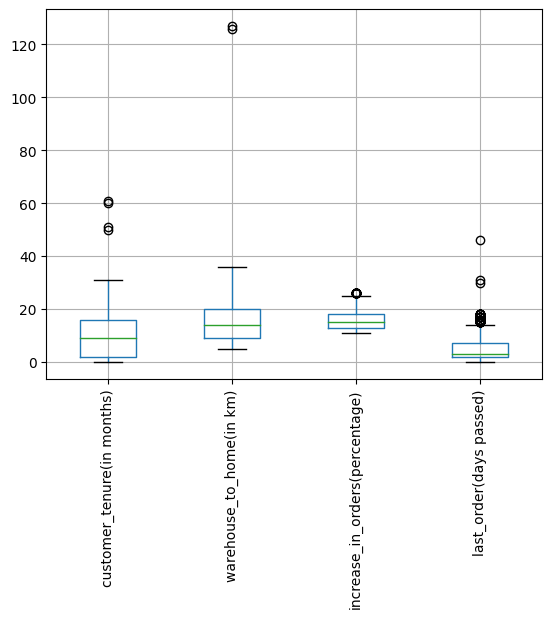

In [25]:
#Box to understand the nature of distribution
updated_cust_df[["customer_tenure(in months)","warehouse_to_home(in km)","increase_in_orders(percentage)","last_order(days passed)"]].boxplot()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

My sole reason to plot this graph seperately is due to the range of values
being small and I wanted to get a better perspective

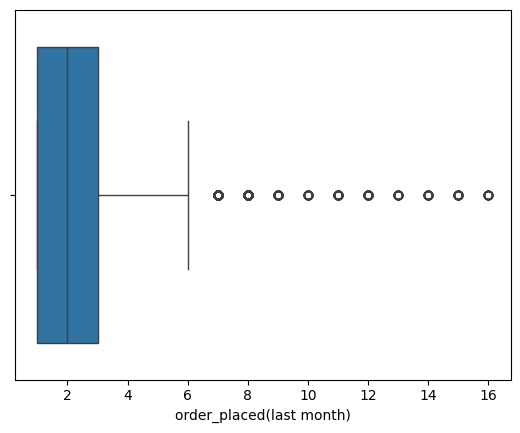

In [26]:
sns.boxplot(data=updated_cust_df, x= "order_placed(last month)")
plt.show()

**OBSERVATION**

- The outliers in our case **doesn't necessarily indicate presence of anomalies**, but rather suggets a **lack of strong bias** in the data points distribution.
- To address the missing values , expecially in the "last_order(days passed)" attribute, **median** would be the optial approach since it is observed that the data is right-skewed.
- While the missing value percentage across all five columns falls within a **manageable range (4-6%)**, imputation with the median is still considered optimal for our **classification model**. This approach preserves the central tendency of the data, potentially leading to improved model performance.

In [27]:
#Calcultaing missing values
print("Count of missing values before imputation: ")
for col in missing_val_cols:
  count = updated_cust_df[col].isnull().sum()
  print(str(col) + " : "+ str(count) )

# Treating missing values
print("\n\nCount of missing values after imputation: ")
for col in missing_val_cols:
  updated_cust_df[col] = updated_cust_df[col].fillna(updated_cust_df[col].median())
  print(str(col) + " : "+ str(updated_cust_df[col].isnull().sum()) )

Count of missing values before imputation: 
customer_tenure(in months) : 264
warehouse_to_home(in km) : 251
increase_in_orders(percentage) : 265
order_placed(last month) : 258
last_order(days passed) : 307


Count of missing values after imputation: 
customer_tenure(in months) : 0
warehouse_to_home(in km) : 0
increase_in_orders(percentage) : 0
order_placed(last month) : 0
last_order(days passed) : 0


In [28]:
# Imputing missing values for daily_app_usage(hours)
updated_cust_df["daily_app_usage(hours)"] = updated_cust_df["daily_app_usage(hours)"].\
                                            fillna(updated_cust_df[col].median())

In [29]:
#final check for missing values
null_col_count(updated_cust_df)

Columns: 


 There '0' columns which contain missing values


ALL THE MISSING VALUES HAVE BEEN IMPUTED

CORRELATION HEATMAP AFTER IMPUTATING MISSING VALUES

In [64]:
updated_cust_df

,churn,customer_tenure(in months),fav_login_device,city_tier,warehouse_to_home(in km),fav_payment_method,gender,daily_app_usage(hours),total_registered_devices,fav_ordering_category(last month),satisfaction_score,martial_status,total_addresses,complain(last month),increase_in_orders(percentage),order_placed(last month),last_order(days passed),churn_status
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,5.0,Customer Churned
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,1.0,0.0,Customer Churned
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,1.0,3.0,Customer Churned
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,1.0,3.0,Customer Churned
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,3.0,Customer Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,2.0,4.0,Customer not Churned
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,2.0,3.0,Customer not Churned
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,2.0,4.0,Customer not Churned
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,9.0,Customer not Churned


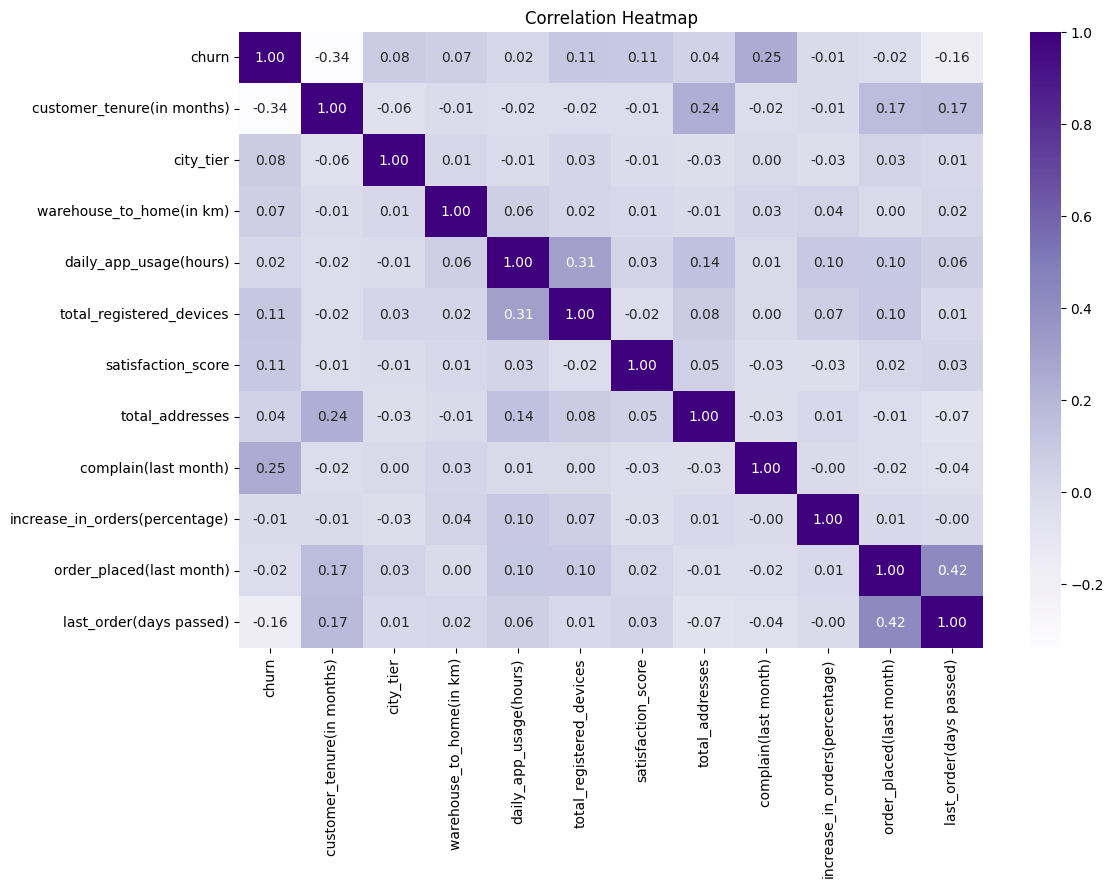

In [30]:
generate_corr_heatmap(updated_cust_df)

**OBSERVATION**

- Our analysis reveals a negative correlation between customer churn and customer tenure (months). This finding aligns with the intuition that increased customer satisfaction often leads to longer customer tenures and a decreased likelihood of churn.
- Additionally, we observe a comparatively high correlation between churn and the number of complaints received in the last month. This suggests that customers with a higher volume of complaints are at greater risk of churning.

## Marital status VS churn and other plots

In [31]:
updated_cust_df.columns

Index(['churn', 'customer_tenure(in months)', 'fav_login_device', 'city_tier',
       'warehouse_to_home(in km)', 'fav_payment_method', 'gender',
       'daily_app_usage(hours)', 'total_registered_devices',
       'fav_ordering_category(last month)', 'satisfaction_score',
       'martial_status', 'total_addresses', 'complain(last month)',
       'increase_in_orders(percentage)', 'order_placed(last month)',
       'last_order(days passed)', 'churn_status'],
      dtype='object')

Text(0.5, 1.0, 'Martial status VS Churn Rate')

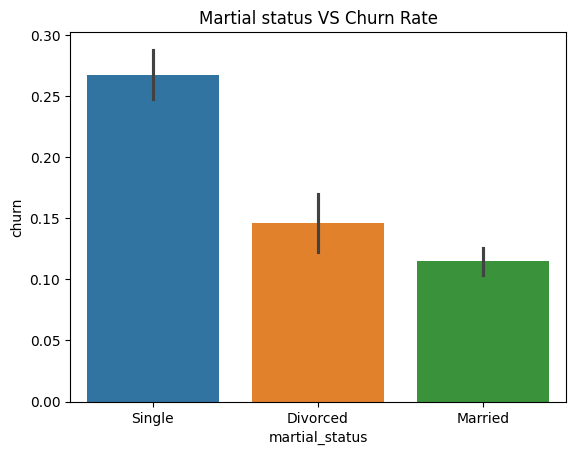

In [32]:
sns.barplot(data=updated_cust_df, x="martial_status", y="churn", hue="martial_status")
plt.title("Martial status VS Churn Rate")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Laptop & Accessory'),
  Text(1, 0, 'Mobile Phone'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fashion'),
  Text(4, 0, 'Grocery')])

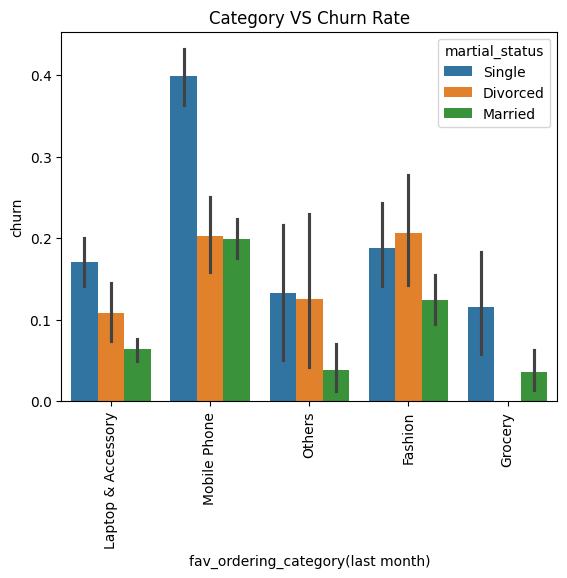

In [33]:
sns.barplot(data=updated_cust_df, x="fav_ordering_category(last month)", y="churn", hue="martial_status")
plt.title("Category VS Churn Rate")
plt.xticks(rotation=90)

Text(0, 0.5, 'Churn Rate')

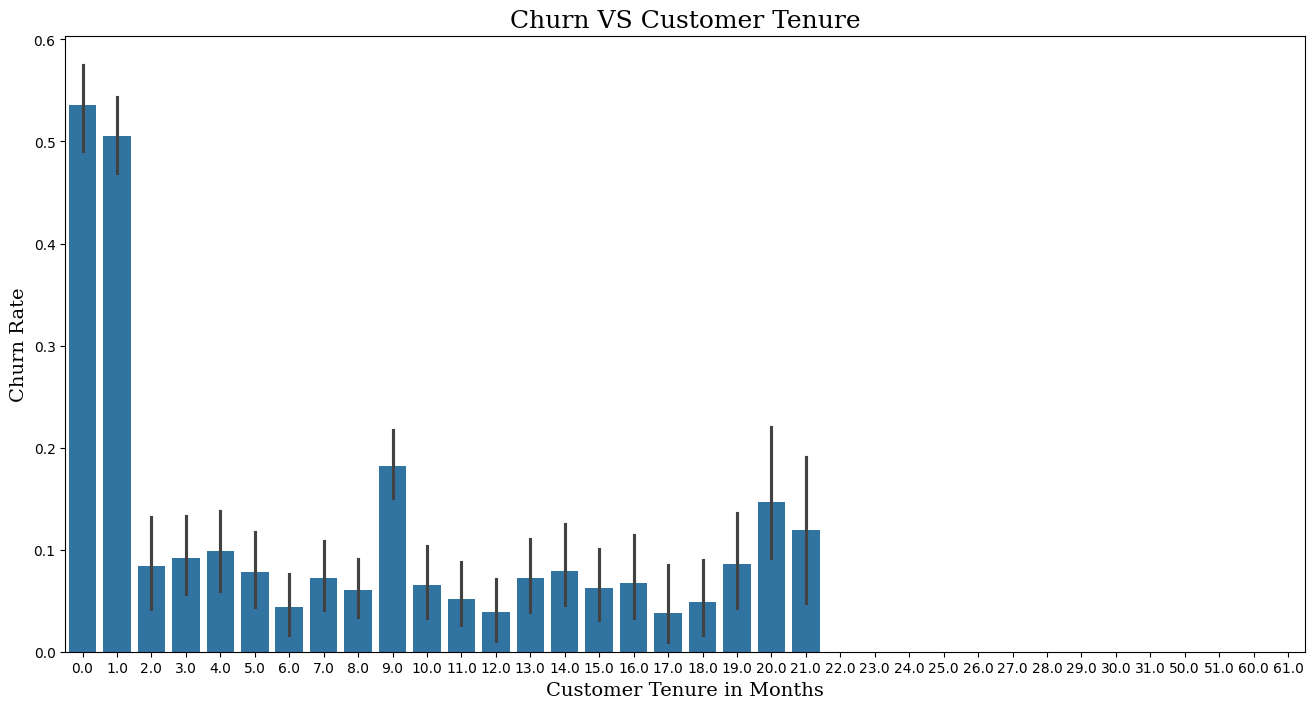

In [72]:
plt.figure(figsize=(16,8))
sns.barplot(data=updated_cust_df, x="customer_tenure(in months)", y ="churn")
plt.title("Churn VS Customer Tenure",fontsize=18, fontfamily="serif")
plt.xlabel("Customer Tenure in Months",fontsize=14, fontfamily="serif")
plt.ylabel("Churn Rate", fontsize=14, fontfamily="serif")

Text(0, 0.5, 'Churn Rate')

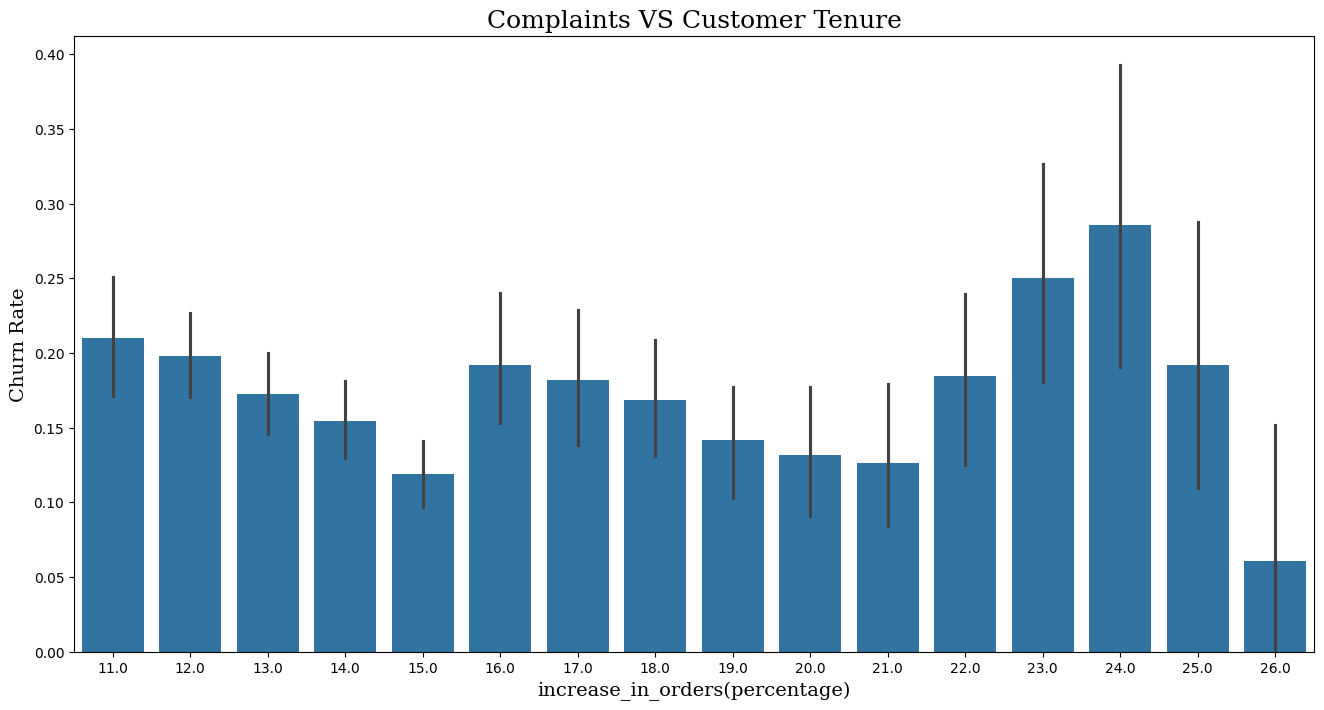

In [82]:
plt.figure(figsize=(16,8))
sns.barplot(data=updated_cust_df, x="increase_in_orders(percentage)", y ="churn")
plt.title("Complaints VS Customer Tenure",fontsize=18, fontfamily="serif")
plt.xlabel("increase_in_orders(percentage)",fontsize=14, fontfamily="serif")
plt.ylabel("Churn Rate", fontsize=14, fontfamily="serif")

## Observation:
It is apparent that the early experience of the customer is very critical and needs further improvement. Notably, this idea comes in the explanation for the churn increase that occurs at the 9-month stage, which has to be delved into further. One explanation could be that such timing coincides with quarterly financial reporting periods when customers reconsider their commitments, hence warranting an increase in churn.

## CLASSIFICATION PREDICTION MODEL

### PERFORMING ONE HOT ENCODING


In [35]:
# list of columns to encode
cols_to_encode = ['fav_login_device', 'fav_payment_method', 'gender',\
                  'fav_ordering_category(last month)', 'martial_status']
selected_df = updated_cust_df[cols_to_encode]

#Initailizing one hot encoding
encoder = OneHotEncoder(sparse=False)

encoded_features = encoder.fit_transform(selected_df)

#New DF with encoded features
encoded_df = pd.DataFrame(encoded_features, columns = encoder.get_feature_names_out(cols_to_encode))
final_df = pd.concat([encoded_df, updated_cust_df.drop(columns=cols_to_encode)],\
                     axis=1)
#droping a derived metric  "Charn_status"
final_df = final_df.drop("churn_status", axis=1)

In [36]:
predictors = final_df.drop("churn", axis = 1)
targets = final_df.churn
print(predictors.columns)

Index(['fav_login_device_Computer', 'fav_login_device_Mobile Phone',
       'fav_payment_method_COD', 'fav_payment_method_Credit Card',
       'fav_payment_method_Debit Card', 'fav_payment_method_E wallet',
       'fav_payment_method_UPI', 'gender_Female', 'gender_Male',
       'fav_ordering_category(last month)_Fashion',
       'fav_ordering_category(last month)_Grocery',
       'fav_ordering_category(last month)_Laptop & Accessory',
       'fav_ordering_category(last month)_Mobile Phone',
       'fav_ordering_category(last month)_Others', 'martial_status_Divorced',
       'martial_status_Married', 'martial_status_Single',
       'customer_tenure(in months)', 'city_tier', 'warehouse_to_home(in km)',
       'daily_app_usage(hours)', 'total_registered_devices',
       'satisfaction_score', 'total_addresses', 'complain(last month)',
       'increase_in_orders(percentage)', 'order_placed(last month)',
       'last_order(days passed)'],
      dtype='object')


### PERFORMING A TRAIN TEST SPLIT

In [37]:
x_train, x_test, y_train, y_test = train_test_split(predictors, targets, test_size = 0.2)

In [38]:
print("Train Test Disection: ")
print(f"Our training set contains {x_train.shape[0]} rows.\nTesting Set\
 contains {x_test.shape[0]} rows")

Train Test Disection: 
Our training set contains 4504 rows.
Testing Set contains 1126 rows


## Decision Trees

In [39]:
#Trainng the decision tree classifier

#Creating an instance of the decision tree classifier
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

# Train the decision tree classifier using the encoded data
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

### CONFUSION MATRIX  - DECISION TREE                 
                  [[True Positives, False Positives],
                  [False Negatives, True negatives]]

In [40]:
dt_predictions = decision_tree.predict(x_test)
sklearn.metrics.confusion_matrix(y_test, dt_predictions)

array([[879,  66],
       [ 91,  90]])

In [41]:
sklearn.metrics.accuracy_score(y_test, dt_predictions)

0.8605683836589698

In [42]:
f1_score(y_test, dt_predictions)

0.5341246290801186

## Naive Bayes

In [43]:
final_df.isnull().sum()

fav_login_device_Computer                               0
fav_login_device_Mobile Phone                           0
fav_payment_method_COD                                  0
fav_payment_method_Credit Card                          0
fav_payment_method_Debit Card                           0
fav_payment_method_E wallet                             0
fav_payment_method_UPI                                  0
gender_Female                                           0
gender_Male                                             0
fav_ordering_category(last month)_Fashion               0
fav_ordering_category(last month)_Grocery               0
fav_ordering_category(last month)_Laptop & Accessory    0
fav_ordering_category(last month)_Mobile Phone          0
fav_ordering_category(last month)_Others                0
martial_status_Divorced                                 0
martial_status_Married                                  0
martial_status_Single                                   0
churn         

In [44]:
# GaussianNB instance
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)
y_train.head()

3351    0
2666    0
3635    0
4196    1
2071    0
Name: churn, dtype: int64

### CONFUSION MATRIX  - NAIVE BAYES                 
                  [[True Positives, False Positives],
                  [False Negatives, True negatives]]

In [45]:
# Score Analysis using confusion matrix
predictions = classifier_nb.predict(x_test)
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[749, 196],
       [ 64, 117]])

In [46]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.7690941385435168

In [47]:
#Getting the F1 Score
f1_score(y_test, predictions)

0.4736842105263158

In [48]:
#Calculating Performance of the model using KFold
X= predictors
Y=updated_cust_df["churn"]
k = 40 #folds
mae_score = [] #mean absolute error
acc_train_scores =[] # accuracy scores on training set
acc_test_scores =[] #accuracy scores on testnig set

#ionitalizing Kfold
kf = KFold(n_splits = 40, shuffle=True, random_state=22)
model = GaussianNB()
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

  #tuning model on trainng fold
  model.fit(X_train, Y_train)

  #Model Evaluation
  acc_train = r2_score(Y_train, model.predict(X_train))
  acc_test = r2_score(Y_test, model.predict(X_test))
  mae = mean_absolute_error(Y_test, model.predict(X_test))
  print(f"Accuracy Training = {acc_train}, Accuracy Testing = {acc_test}, MAE = {mae}")

   #Calculating the numpy absolute value
  acc_train_scores.append(np.abs(acc_train))
  mae_score.append(np.abs(mae))
  acc_test_scores.append(np.abs(acc_test))

#Calculating average Mean Absolute Error
average_mae = sum(mae_score) / len(mae_score)
print(" ")
print(f"across {k} folds :- \n Average MAE; {average_mae}",
      f"Average training Accuracy: {np.mean(acc_train_scores)}",
      f"Average testing Accuracy: {np.mean(acc_test_scores)}")

Accuracy Training = -0.519964450808247, Accuracy Testing = -0.4658869395711498, MAE = 0.22695035460992907
Accuracy Training = -0.503016320439633, Accuracy Testing = -0.8703021370670594, MAE = 0.2553191489361702
Accuracy Training = -0.4887681542916327, Accuracy Testing = -0.747933884297521, MAE = 0.2127659574468085
Accuracy Training = -0.5384852346448734, Accuracy Testing = 0.011859838274932755, MAE = 0.18439716312056736
Accuracy Training = -0.5056133492216484, Accuracy Testing = -0.6044827586206902, MAE = 0.23404255319148937
Accuracy Training = -0.5030013026139502, Accuracy Testing = -0.1855855855855857, MAE = 0.19858156028368795
Accuracy Training = -0.5017107390601363, Accuracy Testing = -0.3557692307692306, MAE = 0.19148936170212766
Accuracy Training = -0.5318051846572618, Accuracy Testing = -0.15777126099706762, MAE = 0.19858156028368795
Accuracy Training = -0.527673245431658, Accuracy Testing = -0.6314049586776862, MAE = 0.19858156028368795
Accuracy Training = -0.49394132004594926,

## Random Forest Classifier

### CONFUSION MATRIX  - RANDOM FOREST                 
                  [[True Positives, False Positives],
                  [False Negatives, True negatives]]

In [49]:
# prompt: Write a code to train the model for Random Forest  algorithm and make a rpedictive model using the train test split we made

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

rf_predictions = rf_model.predict(x_test)
sklearn.metrics.confusion_matrix(y_test, rf_predictions)



array([[937,   8],
       [ 32, 149]])

In [50]:
sklearn.metrics.accuracy_score(y_test, rf_predictions)

0.9644760213143873

In [51]:
#Getting the F1 Score
f1_score(y_test, rf_predictions)

0.8816568047337279

# Conclusion

### Classification Results
 - According to the comprehensive analysis of various classification models, it has been established that the Random Forest model excels over its competitors. The Random Forest model showed higher accuracy, more stability against overfitting, and higher predictive performance on a number of datasets. Its feature selection method is based on its model to handle higher dimensional data sets, its ability to work on large datasets, and its intrinsic feature selection method. In addition, the Random Forest model's ensemble approach to combining multiple decision trees to produce a much more accurate and stable prediction has proved to be a significant advantage. This model further helps to identify churn for future customers in E-comm data.


 ### Churn Analysis
 - **Single User Focus**: "Singles" would be our crucial segment to taget in order to migitagte churn. This could include **introducing more deals**. Or look into optimizing seervices catering to this audience.

 - **Onboarding Optimization**: Make the onboarding experience for customers more seamless, for them to clearly understand the value proposition and how they can make the best out of the services or products.

 - **Loyalty Incentives**: Introduce incentives targeting long-term customer loyalty to stabilize order volumes.

 - **Product Category**: **MObile Phones and Accessories** is our most bleeding product segment.


These are the 4 pain points we need to target in order to reduce Customer churn Rate.